In [111]:
import numpy as np
import scipy 
import matplotlib as mlp
import matplotlib.pyplot as plt 


def read(stderr_file):
    with open(stderr_file, "r") as err:
        stderr_content = err.read()
        # 在这里对 stderr_content 进行处理
        sss = stderr_content.split('\n')[3:-2]
        results = {'time': [],'iteration': [],'value': []}
        for line in sss:
            parts = line.strip().split()
            time = float(parts[1])
            iteration = int(parts[-2])
            value = float(parts[-1])
            results['time'].append(time)
            results['iteration'].append(1+iteration)
            results['value'].append(value)
    return results
def draw(p,N):
    result_file = f'./Order_%d/rho_T_1_N_%d.txt'%(p,N)
    rorder_file = f'./logging_Diric4_%d_%d_SIP2_1E8_stdout.txt'%(p,N)
    data = np.loadtxt(result_file)
    x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T

    plt.figure(figsize=(7,3.2),dpi=200)

    plt.subplot(1,2,1)
    plt.tripcolor(x,y,eh,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(0,1,6))
    plt.yticks(np.linspace(0,1,6))
    plt.xticks(np.linspace(0,1,11),minor=True)
    plt.yticks(np.linspace(0,1,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$E_h(t=\infty)$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.subplot(1,2,2)
    plt.tripcolor(x,y,eh-es,cmap='jet')
    plt.colorbar()
    plt.xticks(np.linspace(0,1,6))
    plt.yticks(np.linspace(0,1,6))
    plt.xticks(np.linspace(0,1,11),minor=True)
    plt.yticks(np.linspace(0,1,11),minor=True)
    plt.grid(which='both')
    plt.title(r'$E_h(t=\infty)-E(t=\infty)$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    plt.suptitle(r'Error of Energy, $\|E_h-E\|/\|E\|$=%.2e'%(
    np.loadtxt(rorder_file)[5]))
    plt.tight_layout()
    plt.show()

In [112]:
!time g++ ../PoiseuilleBatch3.cpp -o PoiseuilleBatch3 -fopenmp -mfma -mavx2 -O3 -g -I../
# -march=skylake -mtune=skylake -flto=8 -fomit-frame-pointer -funroll-loops -fno-math-errno -ffast-math 


real	0m58.495s
user	0m56.646s
sys	0m1.252s


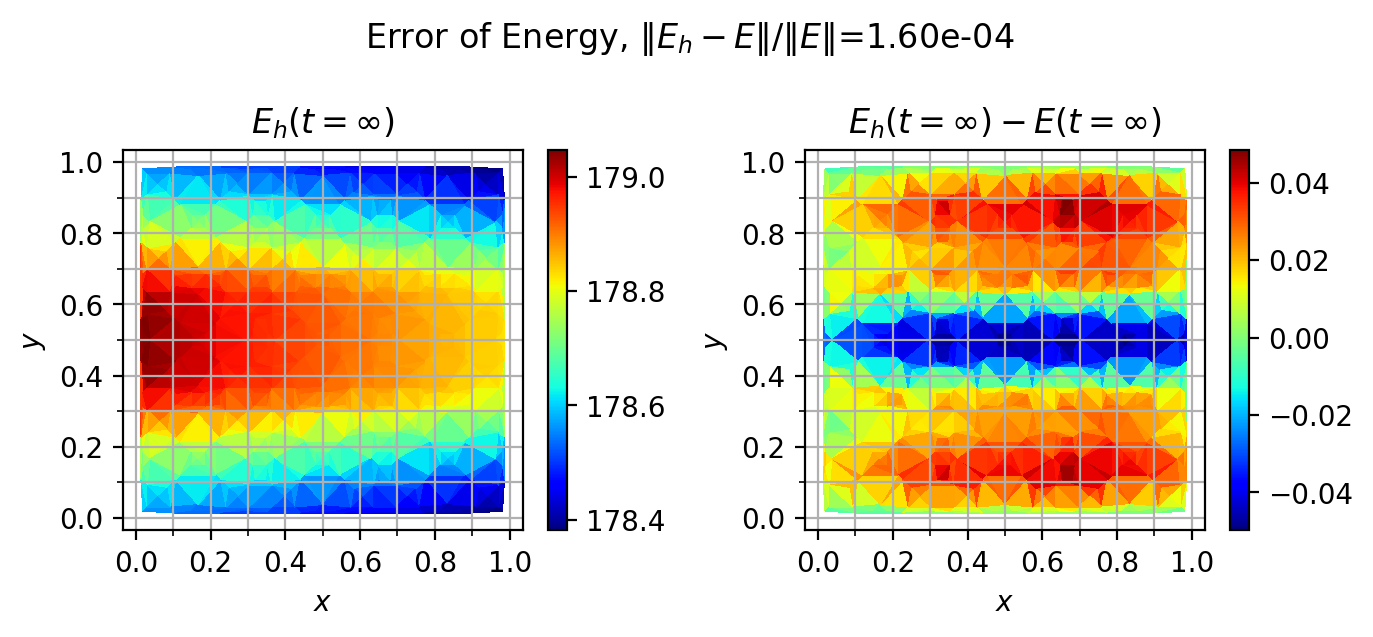

2.256298303604126 [3] [0.000160108]


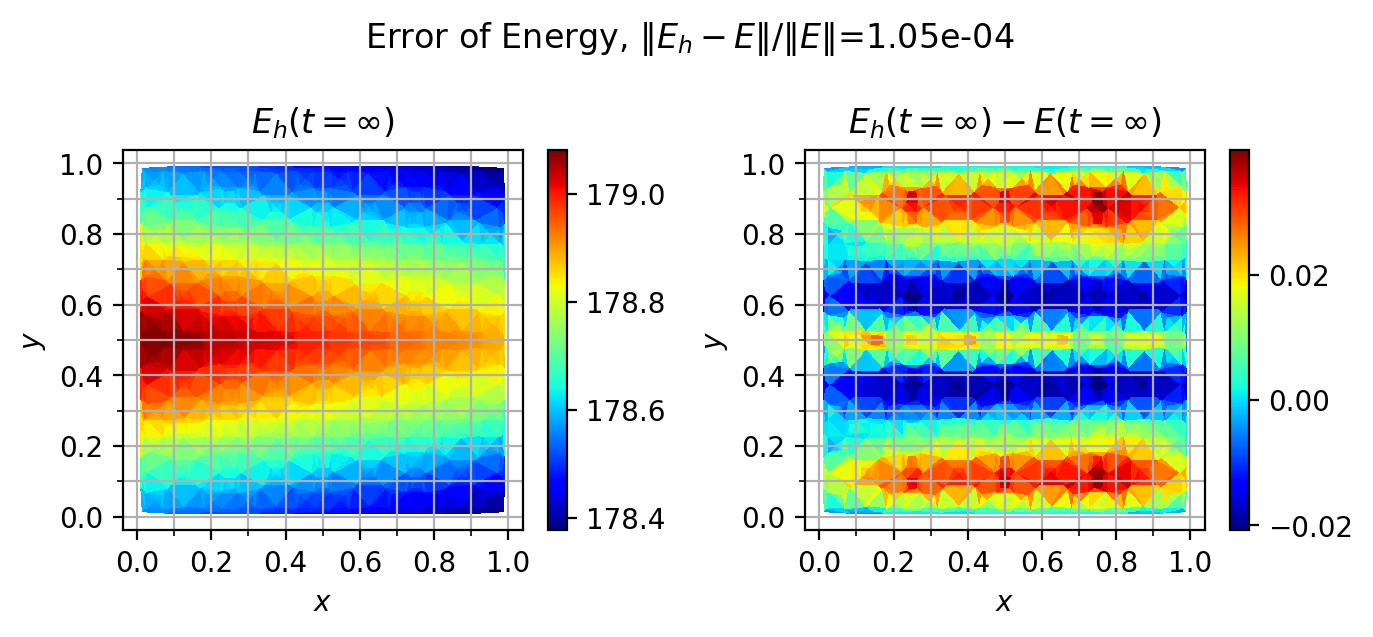

6.298413515090942 [3, 4] [0.000160108, 0.000105485]
[-1.4504895]


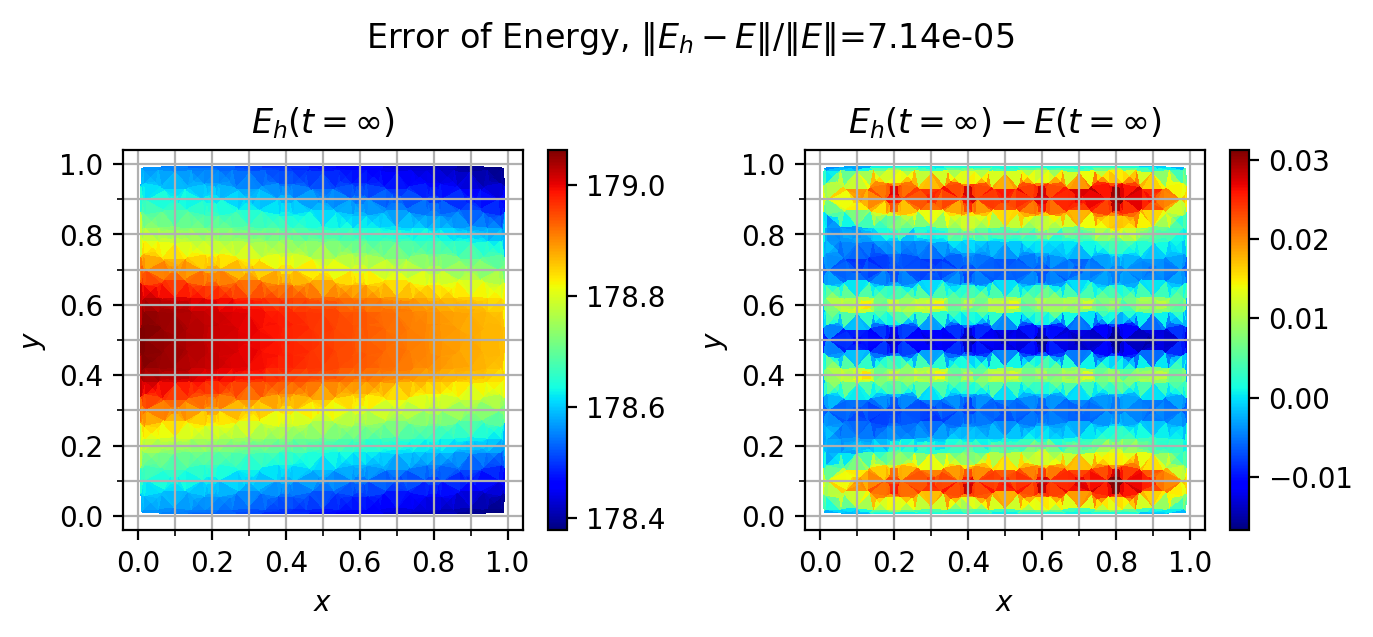

13.630520820617676 [3, 4, 5] [0.000160108, 0.000105485, 7.14378e-05]
[-1.4504895  -1.74659594]


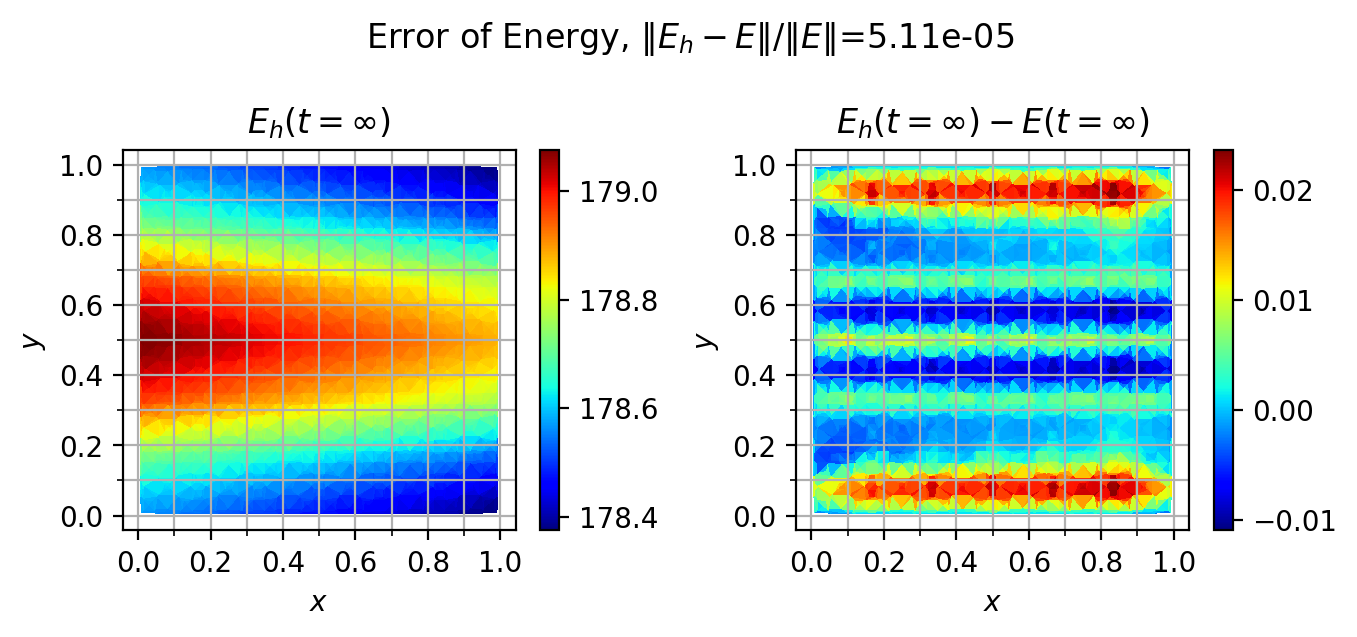

26.291926860809326 [3, 4, 5, 6] [0.000160108, 0.000105485, 7.14378e-05, 5.11036e-05]
[-1.4504895  -1.74659594 -1.83726051]


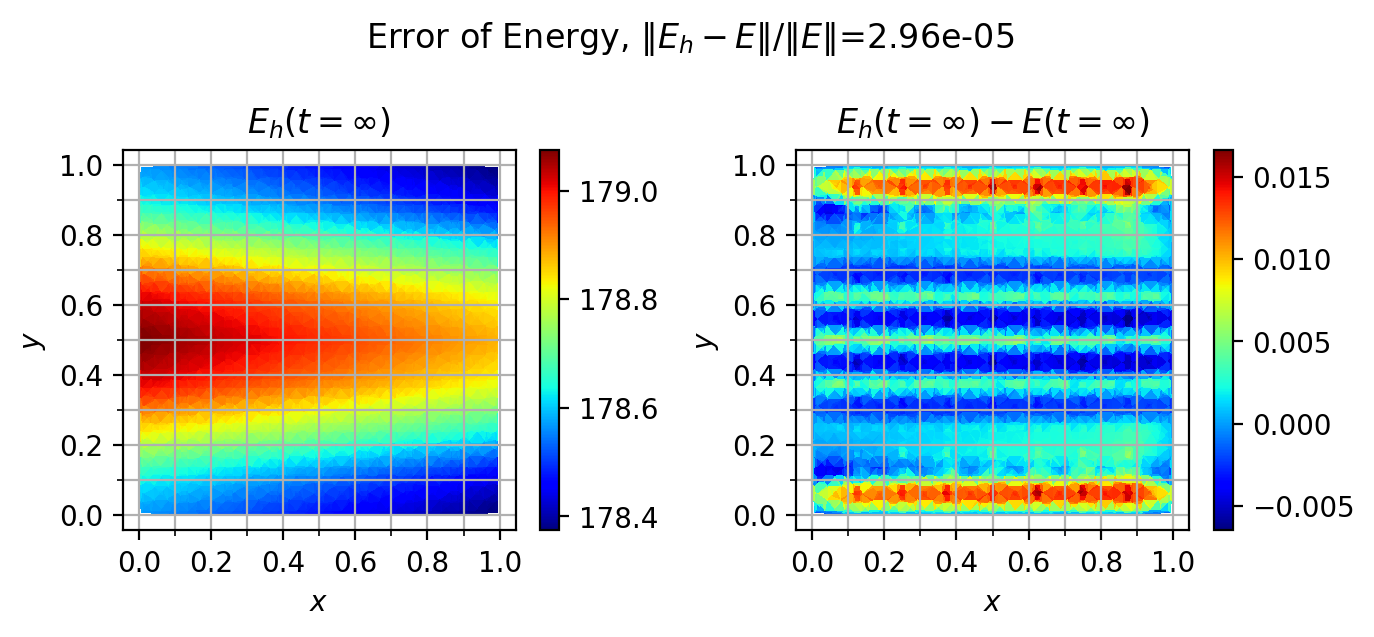

60.94395327568054 [3, 4, 5, 6, 8] [0.000160108, 0.000105485, 7.14378e-05, 5.11036e-05, 2.96325e-05]
[-1.4504895  -1.74659594 -1.83726051 -1.89439407]


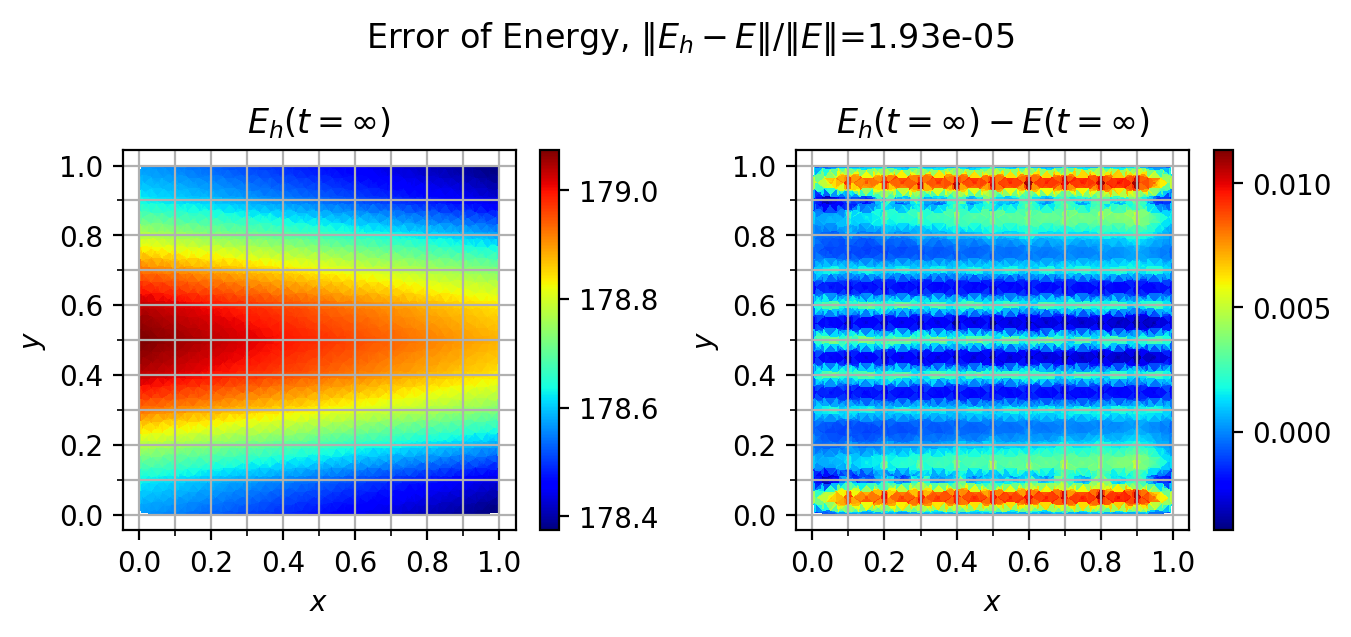

168.1961977481842 [3, 4, 5, 6, 8, 10] [0.000160108, 0.000105485, 7.14378e-05, 5.11036e-05, 2.96325e-05, 1.92629e-05]
[-1.4504895  -1.74659594 -1.83726051 -1.89439407 -1.93010626]


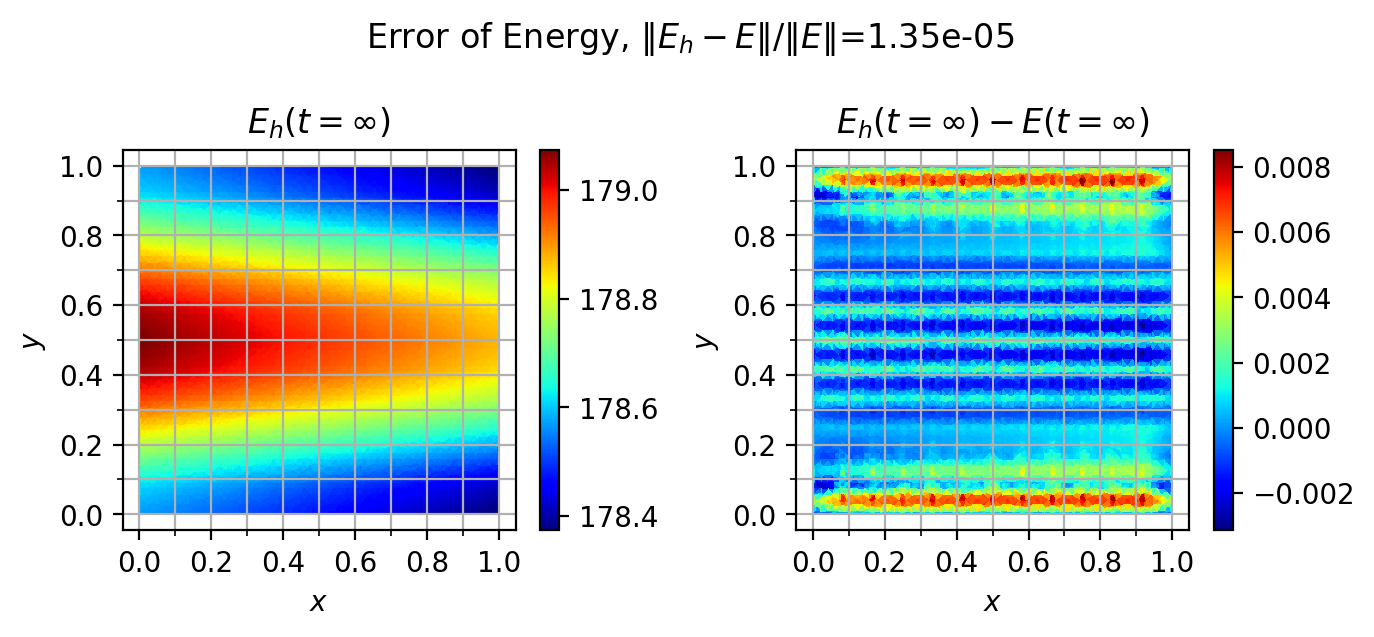

411.42248344421387 [3, 4, 5, 6, 8, 10, 12] [0.000160108, 0.000105485, 7.14378e-05, 5.11036e-05, 2.96325e-05, 1.92629e-05, 1.35079e-05]
[-1.4504895  -1.74659594 -1.83726051 -1.89439407 -1.93010626 -1.9465952 ]


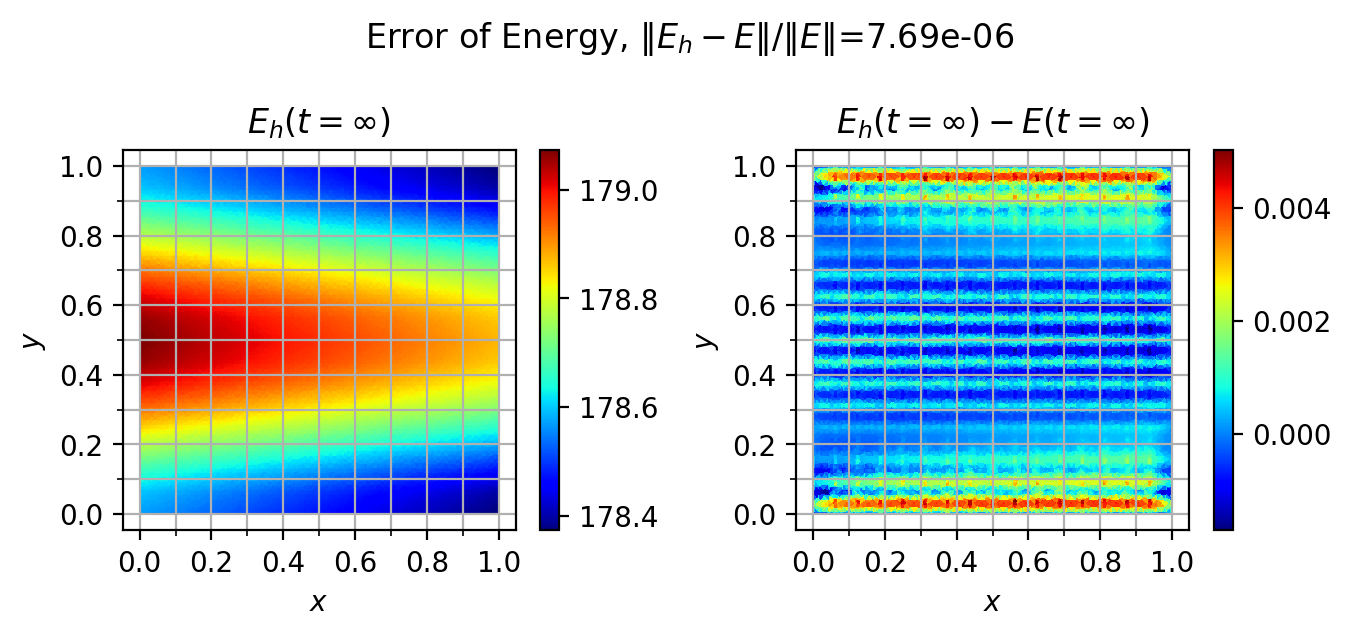

1282.9466953277588 [3, 4, 5, 6, 8, 10, 12, 16] [0.000160108, 0.000105485, 7.14378e-05, 5.11036e-05, 2.96325e-05, 1.92629e-05, 1.35079e-05, 7.68908e-06]
[-1.4504895  -1.74659594 -1.83726051 -1.89439407 -1.93010626 -1.9465952
 -1.95866762]


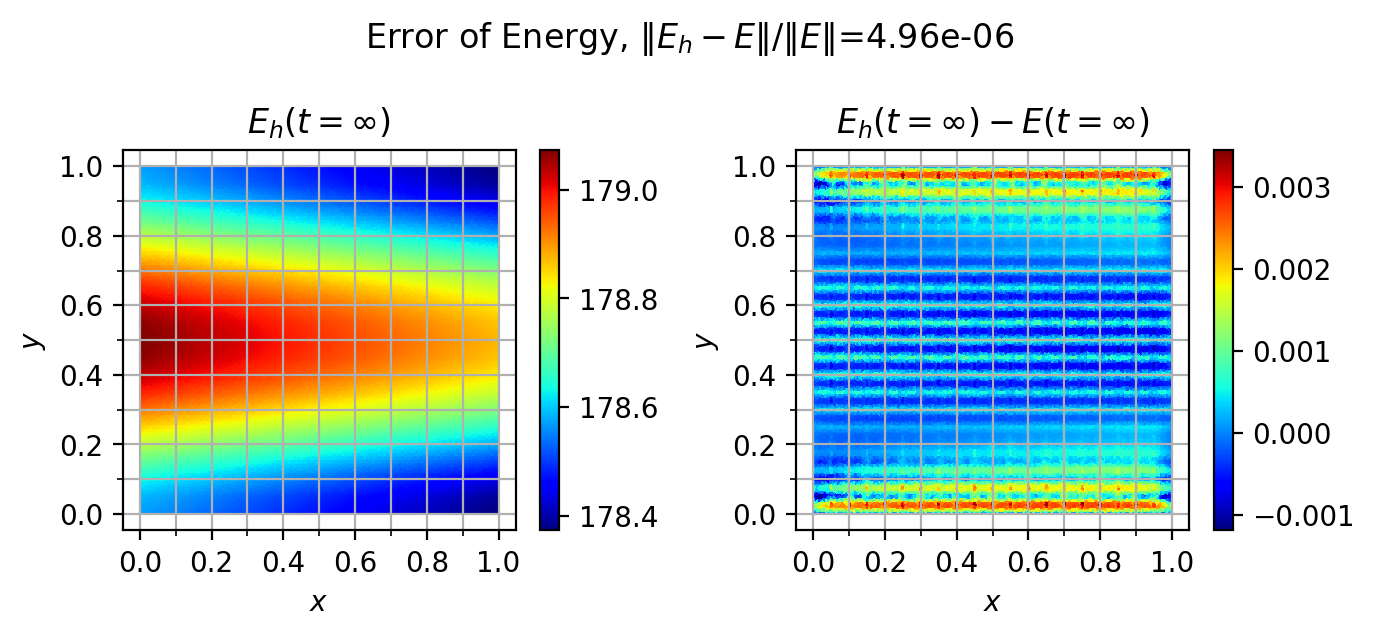

3559.408654689789 [3, 4, 5, 6, 8, 10, 12, 16, 20] [0.000160108, 0.000105485, 7.14378e-05, 5.11036e-05, 2.96325e-05, 1.92629e-05, 1.35079e-05, 7.68908e-06, 4.95662e-06]
[-1.4504895  -1.74659594 -1.83726051 -1.89439407 -1.93010626 -1.9465952
 -1.95866762 -1.96768888]


In [113]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,6,8,10,12,16,20]
left = 0
right = len(N_list)
p = 1
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./logging_Diric4_{p}_{N}_SIP2_1E8_stdout.txt"
    stderr_file = f"./logging_Diric4_{p}_{N}_SIP2_1E8_stderr.txt"

    # 构造命令
    command = f"./PoiseuilleBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./logging_Diric4_{p}_{N}_SIP2_1E8_stdout.txt")[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))


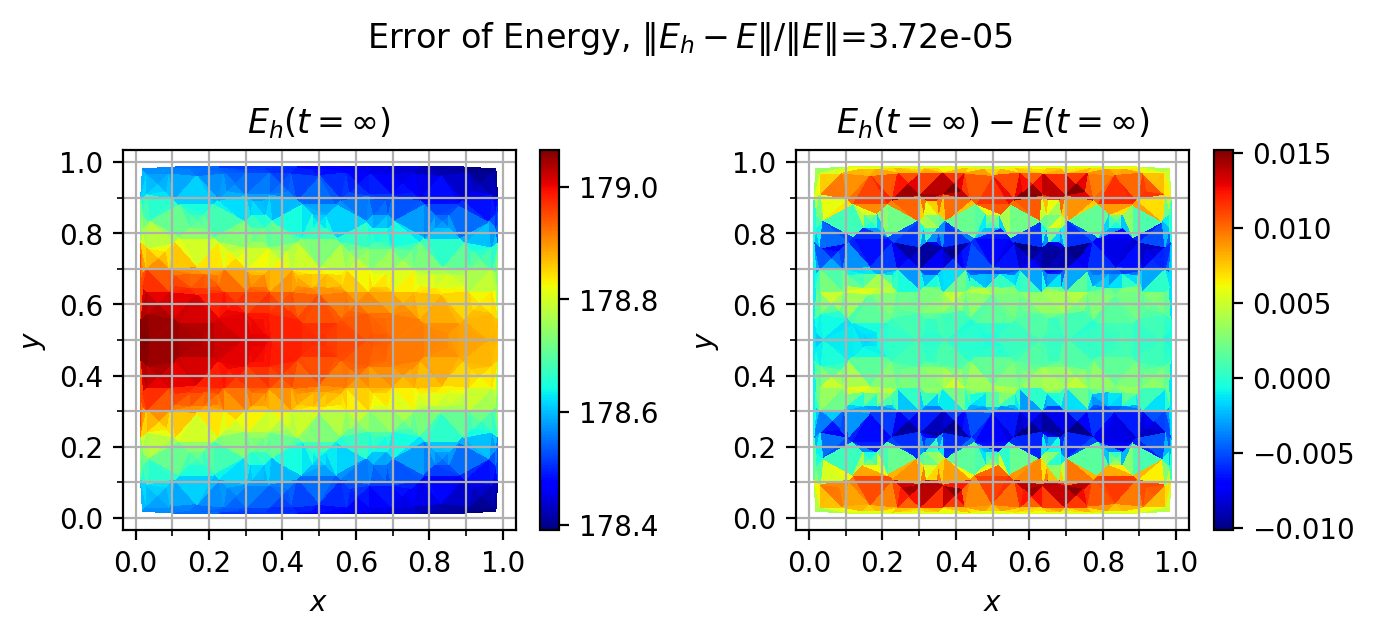

73.79520654678345 [3] [3.72346e-05]


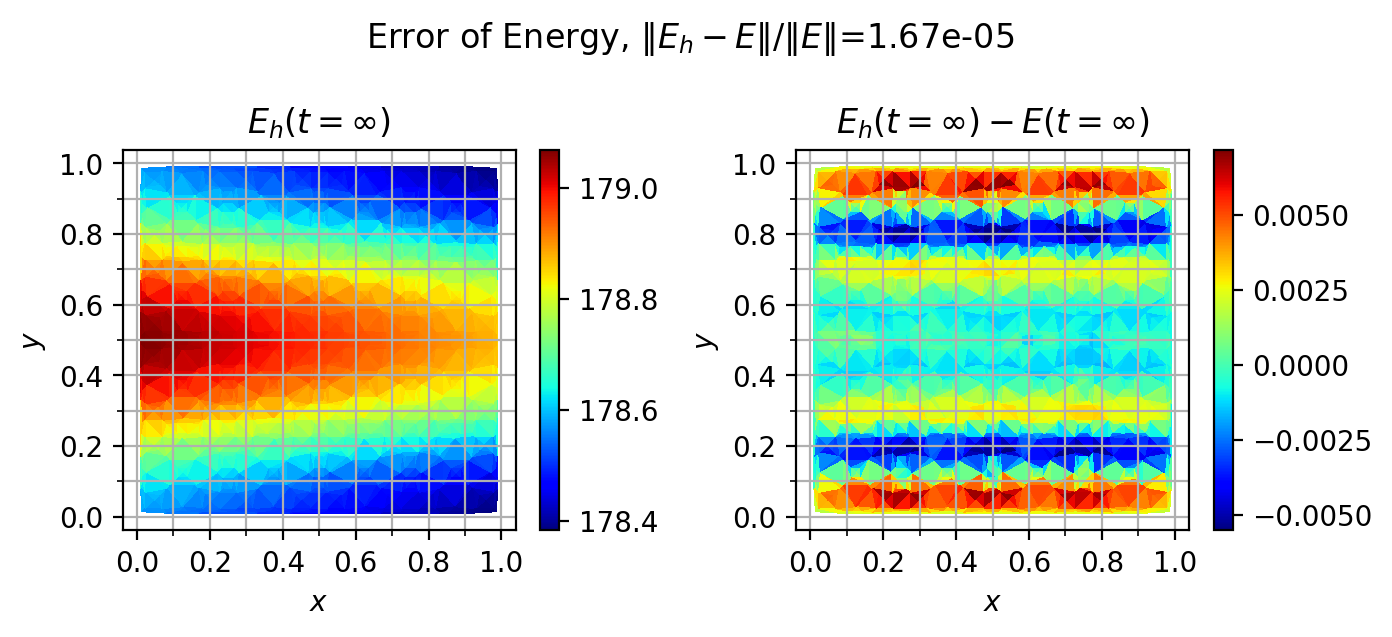

176.7200117111206 [3, 4] [3.72346e-05, 1.67438e-05]
[-2.77810289]


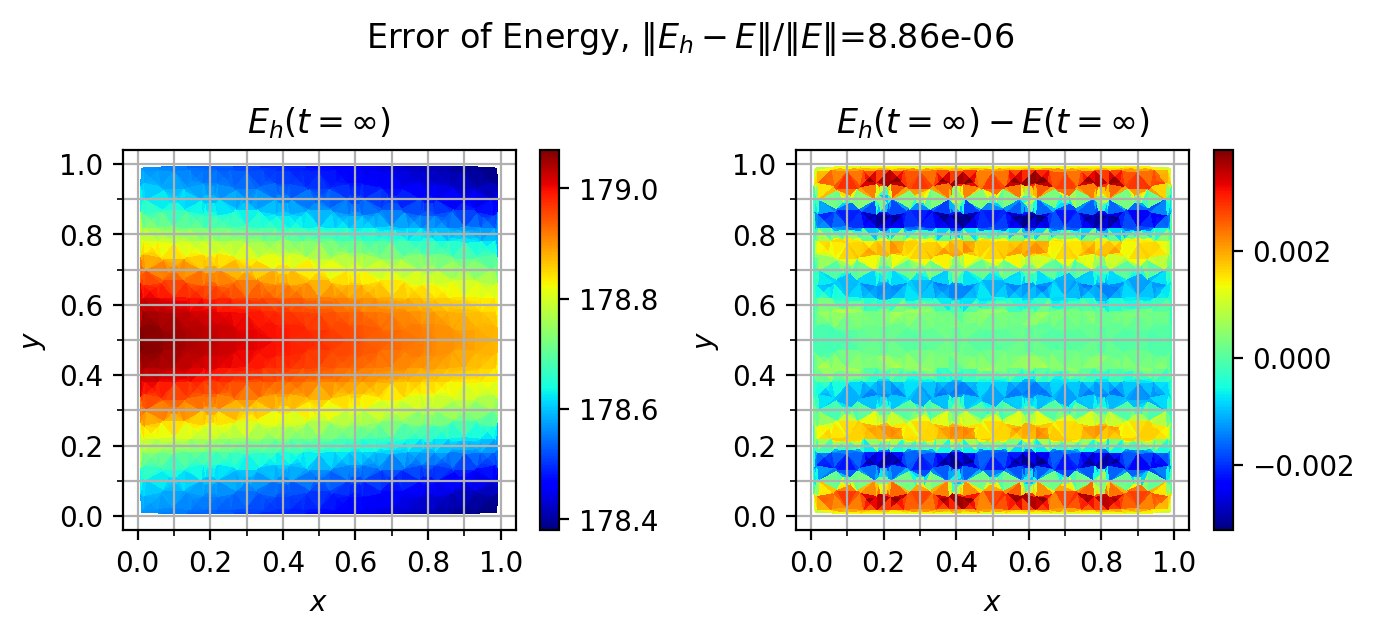

417.01447916030884 [3, 4, 5] [3.72346e-05, 1.67438e-05, 8.86027e-06]
[-2.77810289 -2.85220343]


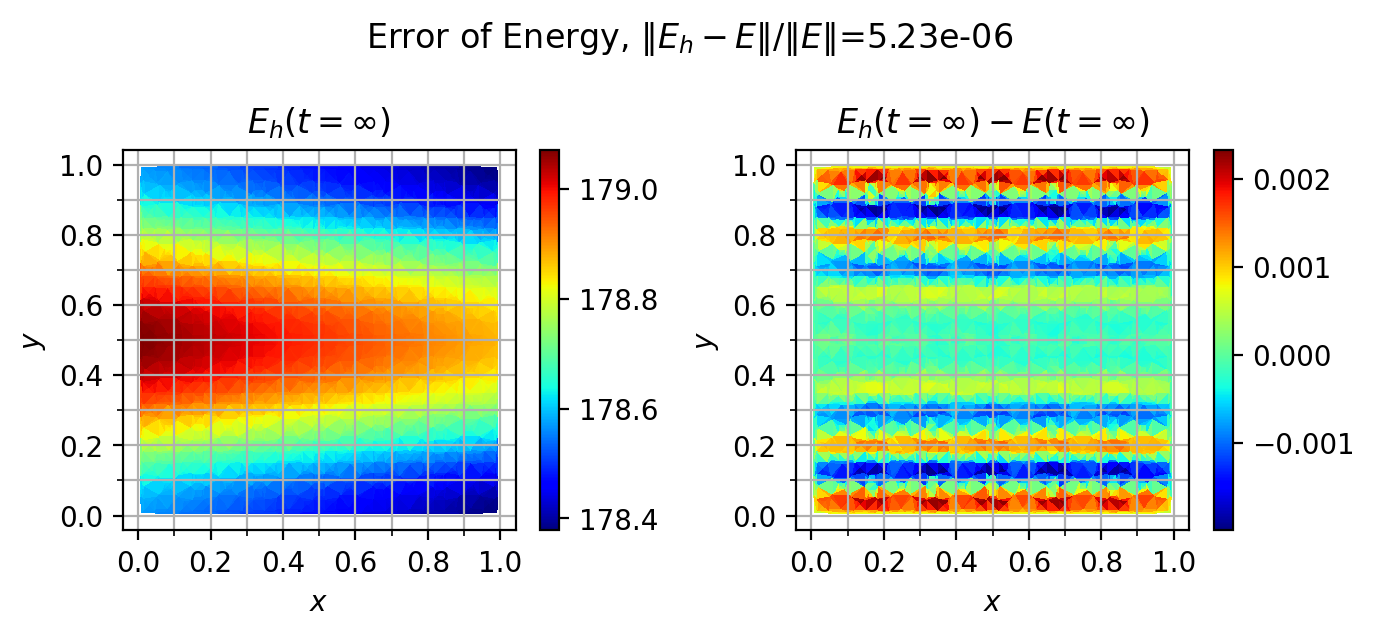

897.3404273986816 [3, 4, 5, 6] [3.72346e-05, 1.67438e-05, 8.86027e-06, 5.23172e-06]
[-2.77810289 -2.85220343 -2.88960423]


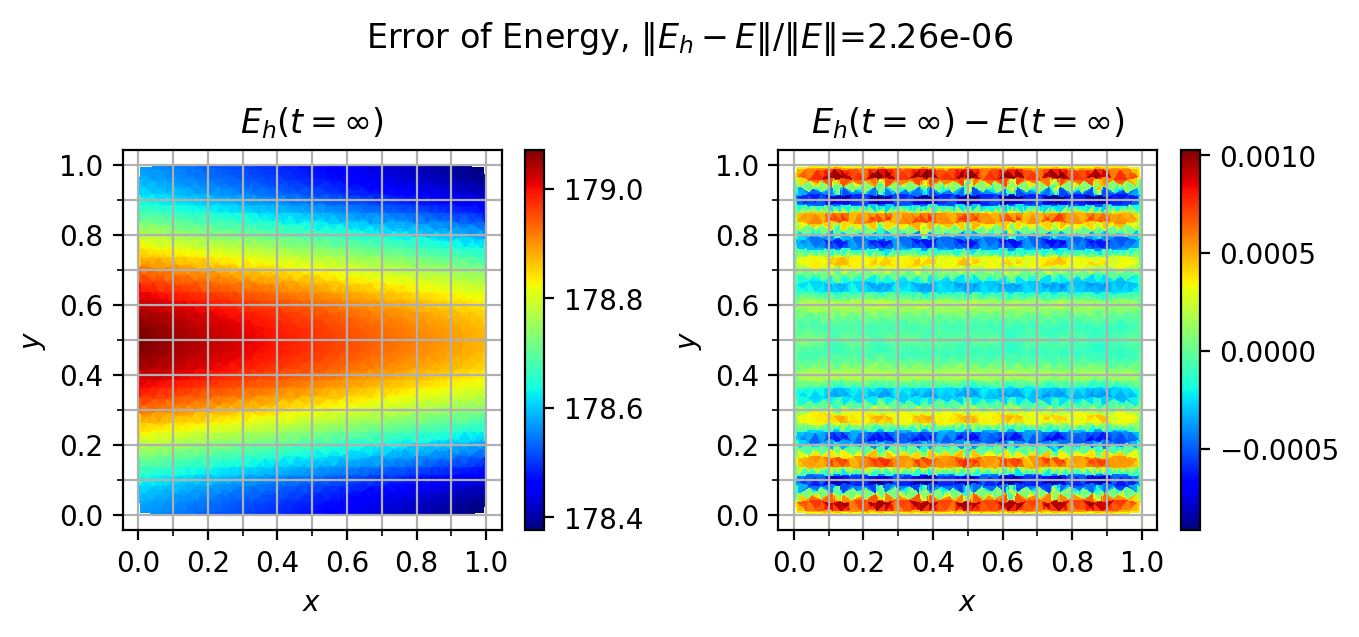

1870.9796319007874 [3, 4, 5, 6, 8] [3.72346e-05, 1.67438e-05, 8.86027e-06, 5.23172e-06, 2.25895e-06]
[-2.77810289 -2.85220343 -2.88960423 -2.91933378]


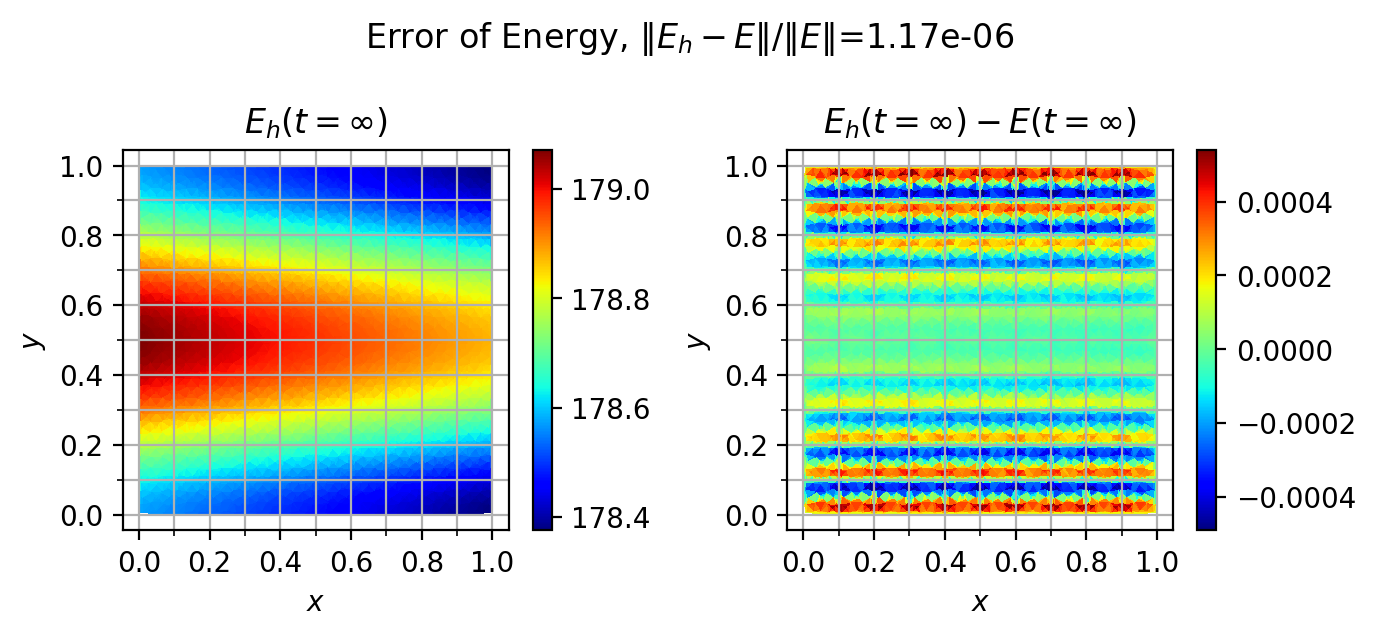

4539.661672592163 [3, 4, 5, 6, 8, 10] [3.72346e-05, 1.67438e-05, 8.86027e-06, 5.23172e-06, 2.25895e-06, 1.17204e-06]
[-2.77810289 -2.85220343 -2.88960423 -2.91933378 -2.94050301]


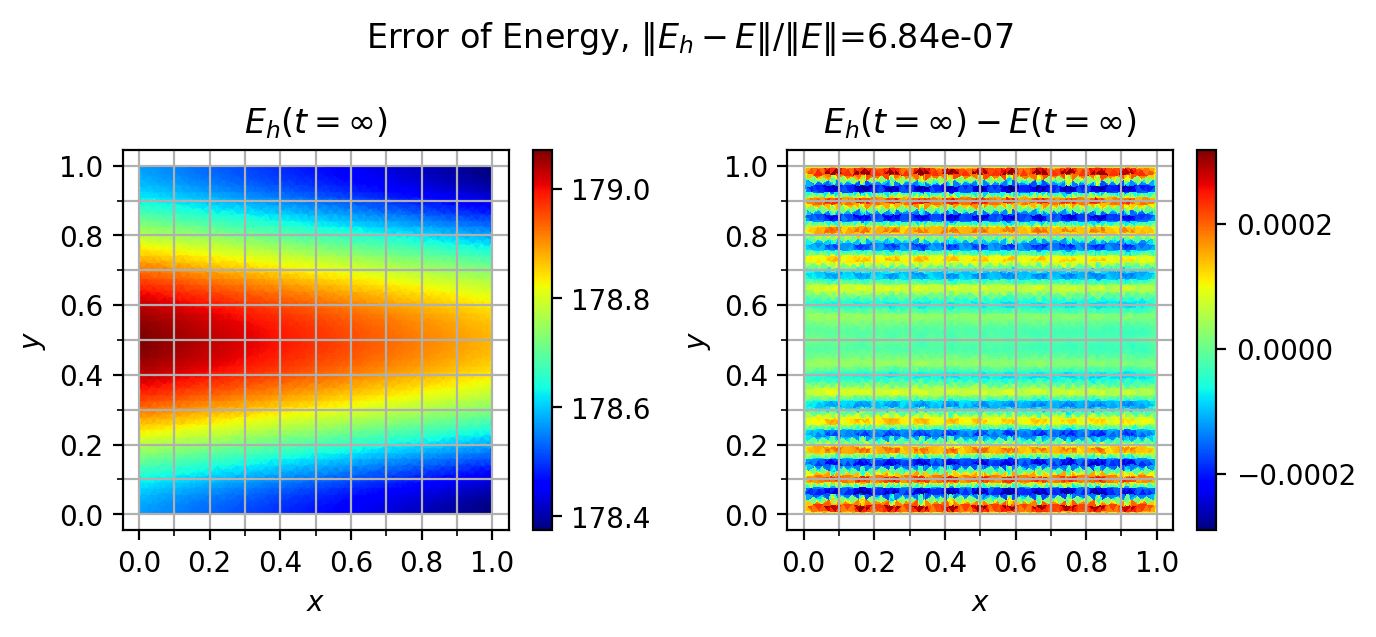

9048.729905366898 [3, 4, 5, 6, 8, 10, 12] [3.72346e-05, 1.67438e-05, 8.86027e-06, 5.23172e-06, 2.25895e-06, 1.17204e-06, 6.84423e-07]
[-2.77810289 -2.85220343 -2.88960423 -2.91933378 -2.94050301 -2.95041882]


In [114]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,6,8,10,12,]
left = 0
right = len(N_list)
p = 2
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./logging_Diric4_{p}_{N}_SIP2_1E8_stdout.txt"
    stderr_file = f"./logging_Diric4_{p}_{N}_SIP2_1E8_stderr.txt"

    # 构造命令
    command = f"./PoiseuilleBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./logging_Diric4_{p}_{N}_SIP2_1E8_stdout.txt")[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))



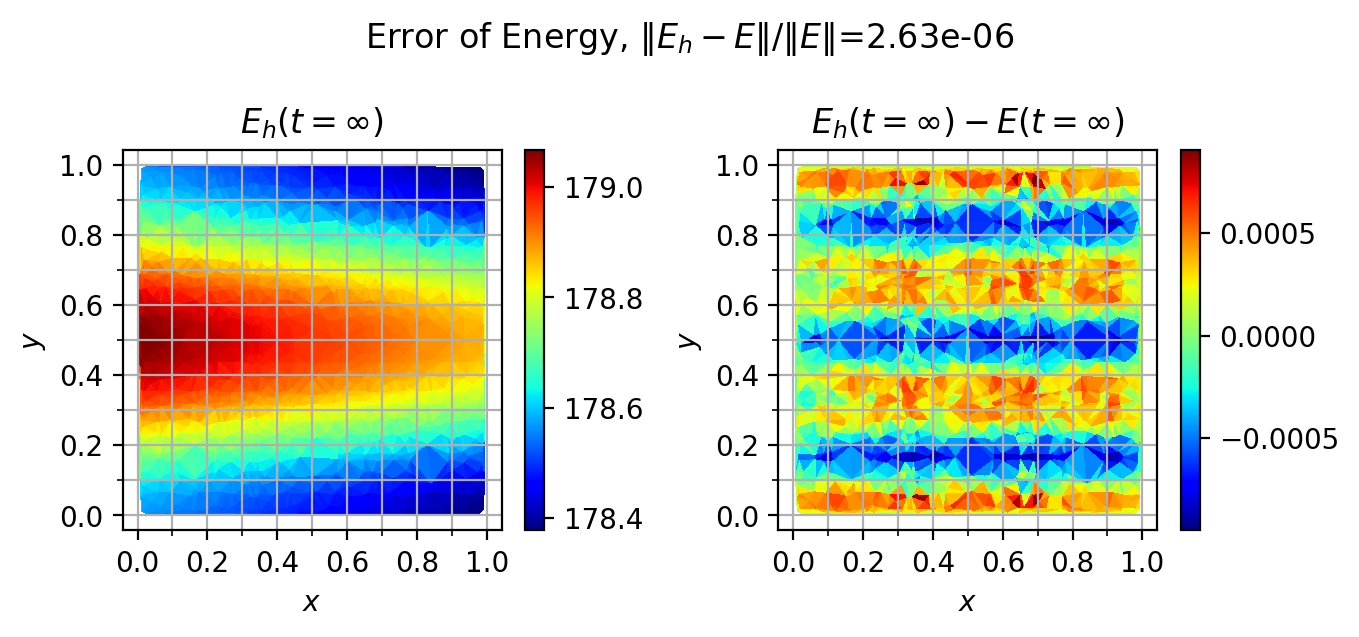

91.55177211761475 [3] [2.62631e-06]


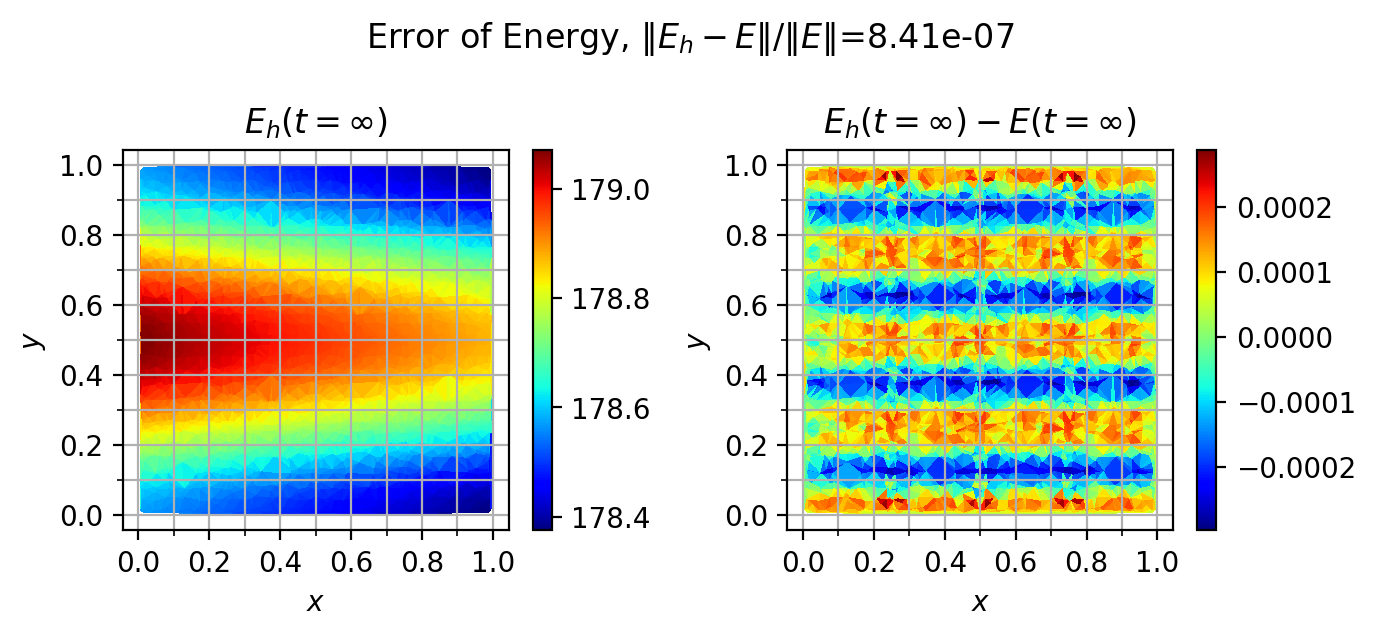

309.562313079834 [3, 4] [2.62631e-06, 8.41099e-07]
[-3.95793078]


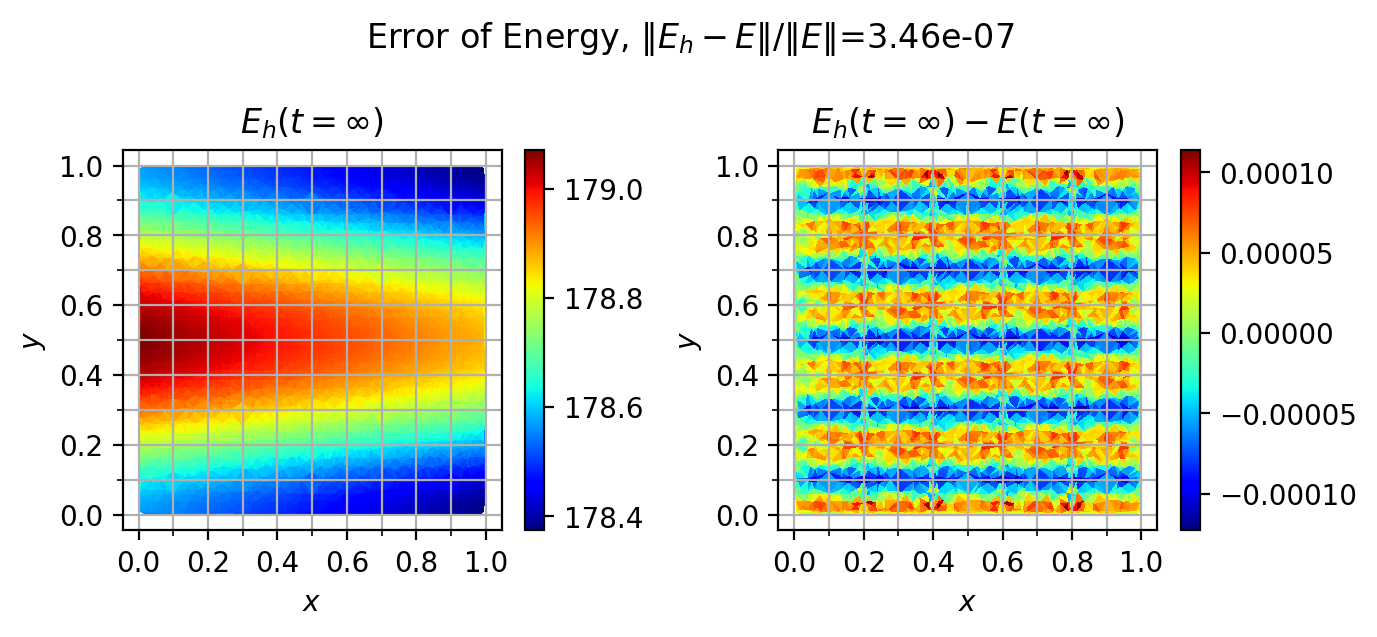

798.6847805976868 [3, 4, 5] [2.62631e-06, 8.41099e-07, 3.45932e-07]
[-3.95793078 -3.98159454]


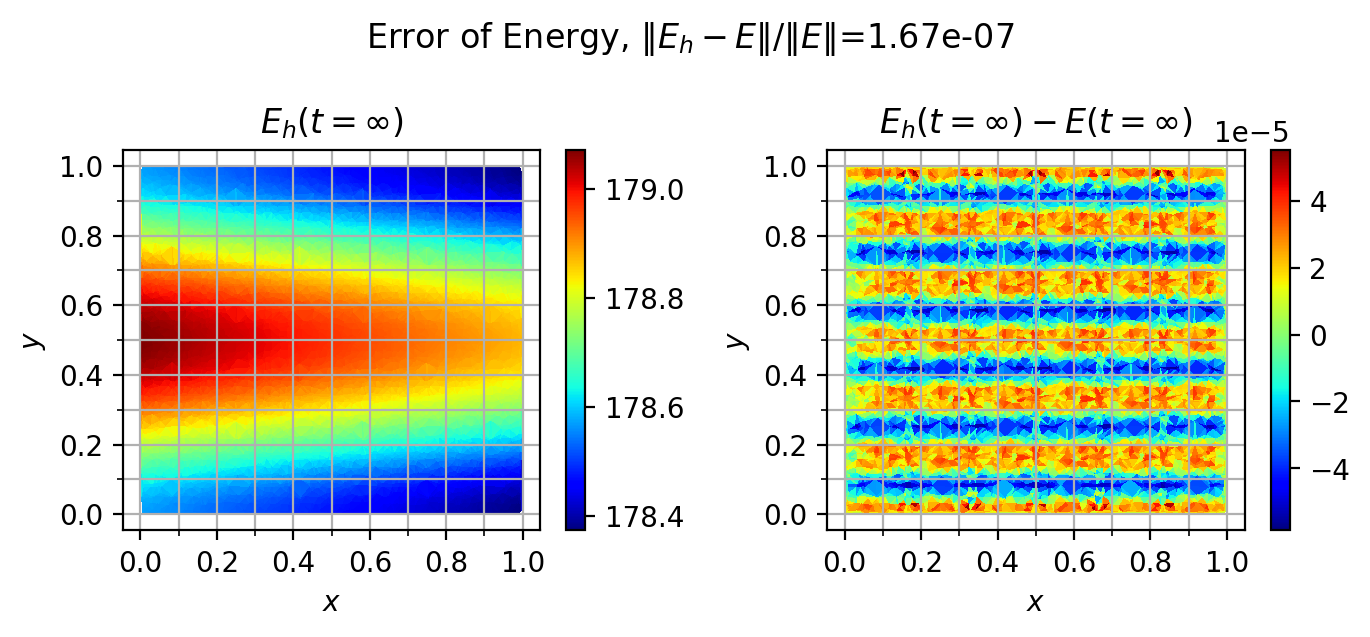

1752.7058999538422 [3, 4, 5, 6] [2.62631e-06, 8.41099e-07, 3.45932e-07, 1.67139e-07]
[-3.95793078 -3.98159454 -3.98974447]


KeyboardInterrupt: 

In [115]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,6,8,]
left = 0
right = len(N_list)
p = 3
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./logging_Diric4_{p}_{N}_SIP2_1E8_stdout.txt"
    stderr_file = f"./logging_Diric4_{p}_{N}_SIP2_1E8_stderr.txt"

    # 构造命令
    command = f"./PoiseuilleBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./logging_Diric4_{p}_{N}_SIP2_1E8_stdout.txt")[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))



In [ ]:
import subprocess
import time

start = time.time()
N_list = [3,4,5,]
left = 0
right = len(N_list)
p = 4
for k,N in enumerate(N_list[left:right]):
    # 定义输出文件路径
    stdout_file = f"./logging_Diric4_{p}_{N}_SIP2_1E8_stdout.txt"
    stderr_file = f"./logging_Diric4_{p}_{N}_SIP2_1E8_stderr.txt"

    # 构造命令
    command = f"./PoiseuilleBatch3 {p} {N}"

    # 执行命令并捕获输出
    with open(stdout_file, "w") as out, open(stderr_file, "w") as err:
        process = subprocess.Popen(command, shell=True, stdout=out, stderr=err)
        process.wait()  # 等待进程完成


    draw(p,N)
    result = {}
    NN = []
    EE = []
    for N in N_list[:(left+k+1)]:
        # result[N] = read(stderr_file)
        NN.append(N)
        EE.append(np.loadtxt(f"./logging_Diric4_{p}_{N}_SIP2_1E8_stdout.txt")[5])
    print(time.time()-start,NN,EE)
    if(len(NN)>1):
        print(np.diff(np.log(np.array(EE)))/np.diff(np.log(np.array(NN))))



/tmp/ipykernel_19535/1567645966.py:19: UserWarning: loadtxt: input contained no data: "./logging_Diric4_3_8_SIP2_1E8_stdout.txt"
  data = np.loadtxt(filename)


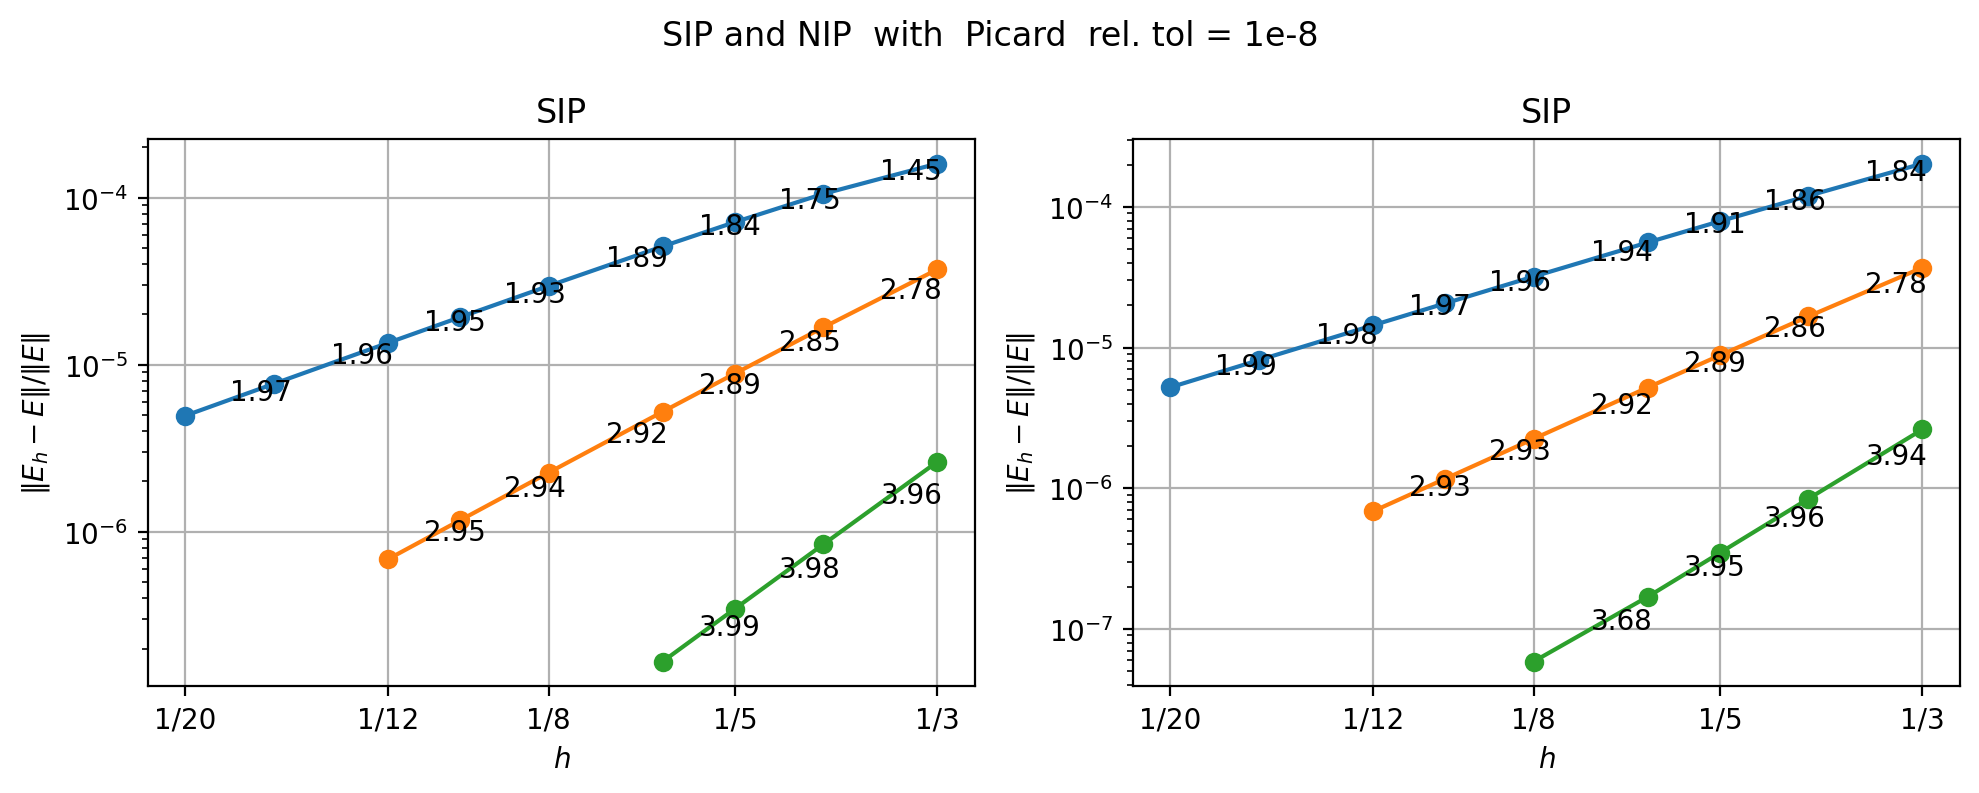

In [118]:
import numpy as np
import scipy 
import matplotlib as mlp
import matplotlib.pyplot as plt 
import os


plt.figure(figsize=(10,4),dpi=200)
plt.suptitle('SIP and NIP  with  Picard  rel. tol = 1e-8')
plt.subplot(1,2,1)
plt.title('SIP')
for p in range(3):
    p = p+1
    NN = []
    EE = []
    for N in range(30):
        filename = f'./logging_Diric4_{p}_{N}_SIP2_1E8_stdout.txt'
        if not os.path.exists(filename): continue
        data = np.loadtxt(filename)
        if(len(data)==0): continue
        err = data[5]
        NN.append(N)
        EE.append(err)
    h = 1/np.array(NN)
    error = np.array(EE)
    order = np.diff(np.log(error))/np.diff(np.log(h))
    plt.loglog(h,error,'o-',label='p=%d'%(p))
    gm = lambda x: (x[1:]*x[:-1])**0.5
    for x,y,o in zip(gm(h),gm(error),order):
        plt.text(x,y,o.round(2))
plt.xlabel(r'$h$')
plt.xticks([],minor=True)
plt.xticks([1/v for v in [3,5,8,12,20]],['1/%d'%v for v in [3,5,8,12,20]])
plt.ylabel(r'$\|E_h-E\|/\|E\|$')
plt.grid()
plt.subplot(1,2,2)
plt.title('SIP')
for p in range(3):
    p = p+1
    NN = []
    EE = []
    for N in range(30):
        filename = f'./logging_Diric4_{p}_{N}_SIP_1E8_stdout.txt'
        if not os.path.exists(filename): continue
        data = np.loadtxt(filename)
        if(len(data)==0): continue
        err = data[5]
        NN.append(N)
        EE.append(err)
    h = 1/np.array(NN)
    error = np.array(EE)
    order = np.diff(np.log(error))/np.diff(np.log(h))
    plt.loglog(h,error,'o-',label='p=%d'%(p))
    gm = lambda x: (x[1:]*x[:-1])**0.5
    for x,y,o in zip(gm(h),gm(error),order):
        plt.text(x,y,o.round(2))

plt.xlabel(r'$h$')
plt.xticks([],minor=True)
plt.xticks([1/v for v in [3,5,8,12,20]],['1/%d'%v for v in [3,5,8,12,20]])
plt.ylabel(r'$\|E_h-E\|/\|E\|$')
plt.grid()
plt.tight_layout()
plt.show()

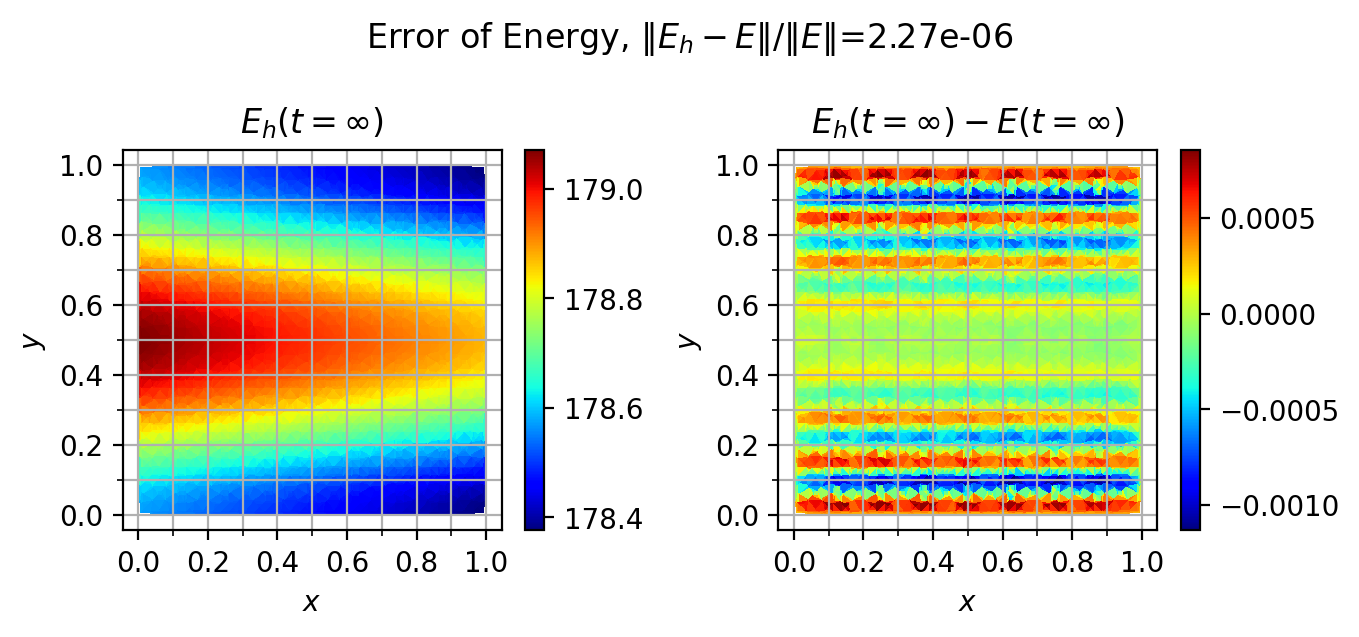

In [14]:
p = 2
N = 8
result_file = f'./Order_%d/rho_T_1_N_%d.txt'%(p,N)
rorder_file = f'./logging_Diric4_%d_%d_SIP2_1E8_stdout.txt'%(p,N)
data = np.loadtxt(result_file)
x,y,z, rh,rs, uh,us, vh,vs, wh,ws, eh,es = data.T

plt.figure(figsize=(7,3.2),dpi=200)

plt.subplot(1,2,1)
plt.tripcolor(x,y,eh,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,11),minor=True)
plt.yticks(np.linspace(0,1,11),minor=True)
plt.grid(which='both')
plt.title(r'$E_h(t=\infty)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.subplot(1,2,2)
plt.tripcolor(x,y,eh-es,cmap='jet')
plt.colorbar()
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
plt.xticks(np.linspace(0,1,11),minor=True)
plt.yticks(np.linspace(0,1,11),minor=True)
plt.grid(which='both')
plt.title(r'$E_h(t=\infty)-E(t=\infty)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.suptitle(r'Error of Energy, $\|E_h-E\|/\|E\|$=%.2e'%(
np.loadtxt(rorder_file)[5]))
plt.tight_layout()
plt.show()

In [56]:
for p in range(3):
    p = p+1
    NN = []
    EE = []
    for N in range(30):
        filename = f'./logging_Diric4_{p}_{N}_rel1E8_stdout.txt'
        if os.path.exists(filename): 
            os.rename(f'./logging_Diric4_{p}_{N}_rel1E8_stdout.txt',f'./logging_Diric4_{p}_{N}_NIP_1E8_stdout.txt')
            os.rename(f'./logging_Diric4_{p}_{N}_rel1E8_stderr.txt',f'./logging_Diric4_{p}_{N}_NIP_1E8_stderr.txt')
        